In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# データを変数に入れる
ibaraki = gpd.read_file('ibaraki.geojson')

<Axes: >

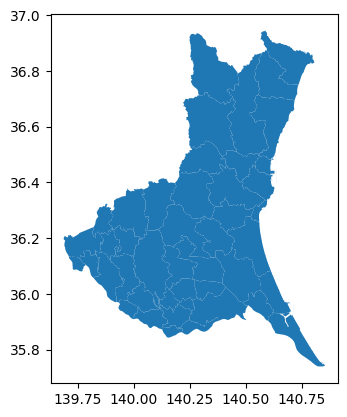

In [3]:
ibaraki.plot()

In [4]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [5]:
# rename
ibaraki.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [6]:
ibaraki_chika = pd.read_csv('finalchika.csv')

In [7]:
ibaraki_chika

,KEY_CODE,市区町村,地価平均,年度,人口
0,8201,水戸市,113888,2002年,262949
1,8201,水戸市,101556,2003年,263845
2,8201,水戸市,89555,2004年,264136
3,8201,水戸市,81710,2005年,262603
4,8201,水戸市,76908,2006年,263267
...,...,...,...,...,...
963,8564,利根町,15278,2019年,15403
964,8564,利根町,15158,2020年,15340
965,8564,利根町,14962,2021年,15181
966,8564,利根町,14768,2022年,14966


In [8]:
ibaraki_chika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  968 non-null    int64 
 1   市区町村      968 non-null    object
 2   地価平均      968 non-null    int64 
 3   年度        968 non-null    object
 4   人口        968 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.9+ KB


In [9]:
# OBJECTからintに変える
ibaraki['KEY_CODE'] = ibaraki['KEY_CODE'].astype(int)

In [10]:
# '年度'列に平成14年の行だけを抽出
df_2002 = ibaraki_chika[ibaraki_chika['年度'] == '2002年']

# 結果を表示
print(df_2002)


     KEY_CODE     市区町村    地価平均     年度      人口
0        8201      水戸市  113888  2002年  262949
22       8202      日立市   75152  2002年  204679
44       8203      土浦市   74703  2002年  144788
66       8204      古河市   66520  2002年  146674
88       8205      石岡市   47988  2002年   83053
110      8207      結城市   55225  2002年   52803
132      8208     龍ケ崎市   63180  2002年   78557
154      8210      下妻市   50455  2002年   46788
176      8211      常総市   48270  2002年   66815
198      8212    常陸太田市   51741  2002年   61442
220      8214      高萩市   64800  2002年   34254
242      8215     北茨城市   64742  2002年   51115
264      8216      笠間市   53241  2002年   82432
286      8217      取手市   93537  2002年  114155
308      8219      牛久市   75718  2002年   74829
330      8220     つくば市   69192  2002年  195046
352      8221   ひたちなか市   72558  2002年  152309
374      8222      鹿嶋市   40992  2002年   63104
396      8223      潮来市   28258  2002年   31886
418      8224      守谷市   63462  2002年   51974
440      8225    常陸大宮市   47133  20

In [11]:
df_2002.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 946
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  44 non-null     int64 
 1   市区町村      44 non-null     object
 2   地価平均      44 non-null     int64 
 3   年度        44 non-null     object
 4   人口        44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2002 = ibaraki.merge(df_2002,on='KEY_CODE')

In [13]:
ibaraki_pop2002

,N03_001,N03_002,N03_003,N03_004,N03_005,KEY_CODE,geometry,市区町村,地価平均,年度,人口
0,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,113888,2002年,262949
1,茨城県,None,None,日立市,None,8202,"POLYGON ((140.62736 36.48348, 140.62697 36.483...",日立市,75152,2002年,204679
2,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63352 36.48167, 140.63349 36.481...",日立市,75152,2002年,204679
3,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63684 36.48263, 140.63683 36.479...",日立市,75152,2002年,204679
4,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63091 36.49787, 140.63081 36.498...",日立市,75152,2002年,204679
...,...,...,...,...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,8542,"POLYGON ((139.77252 36.08333, 139.77252 36.083...",五霞町,42425,2002年,10180
216,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.81903 36.05802, 139.82017 36.057...",境町,41100,2002年,27080
217,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.84043 36.08864, 139.84028 36.088...",境町,41100,2002年,27080
218,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.84335 36.09704, 139.84319 36.097...",境町,41100,2002年,27080


In [14]:
ibaraki_pop2002.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   220 non-null    object  
 1   N03_002   0 non-null      object  
 2   N03_003   114 non-null    object  
 3   N03_004   220 non-null    object  
 4   N03_005   0 non-null      object  
 5   KEY_CODE  220 non-null    int32   
 6   geometry  220 non-null    geometry
 7   市区町村      220 non-null    object  
 8   地価平均      220 non-null    int64   
 9   年度        220 non-null    object  
 10  人口        220 non-null    int64   
dtypes: geometry(1), int32(1), int64(2), object(7)
memory usage: 18.2+ KB


<Axes: >

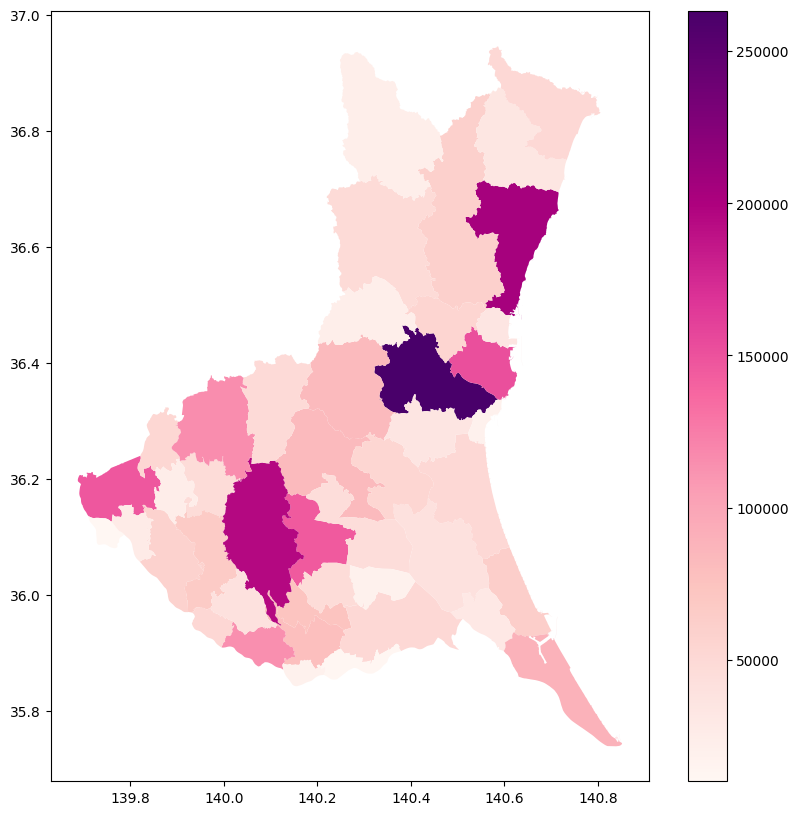

In [15]:
ibaraki_pop2002.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

In [16]:
# '年度'列に平成14年の行だけを抽出
df_2003 = ibaraki_chika[ibaraki_chika['年度'] == '2003年']

# 結果を表示
print(df_2003)

     KEY_CODE     市区町村    地価平均     年度      人口
1        8201      水戸市  101556  2003年  263845
23       8202      日立市   68722  2003年  203502
45       8203      土浦市   65067  2003年  144404
67       8204      古河市   62569  2003年  146640
89       8205      石岡市   44081  2003年   83147
111      8207      結城市   51841  2003年   52858
133      8208     龍ケ崎市   56773  2003年   79274
155      8210      下妻市   47233  2003年   46816
177      8211      常総市   44960  2003年   67213
199      8212    常陸太田市   48116  2003年   61118
221      8214      高萩市   60780  2003年   33983
243      8215     北茨城市   60528  2003年   50678
265      8216      笠間市   50433  2003年   82119
287      8217      取手市   85813  2003年  113803
309      8219      牛久市   68493  2003年   75433
331      8220     つくば市   65531  2003年  196247
353      8221   ひたちなか市   68158  2003年  152860
375      8222      鹿嶋市   37414  2003年   63621
397      8223      潮来市   26980  2003年   31530
419      8224      守谷市   58354  2003年   52564
441      8225    常陸大宮市   45766  20

In [17]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2003 = ibaraki.merge(df_2003,on='KEY_CODE')

<Axes: >

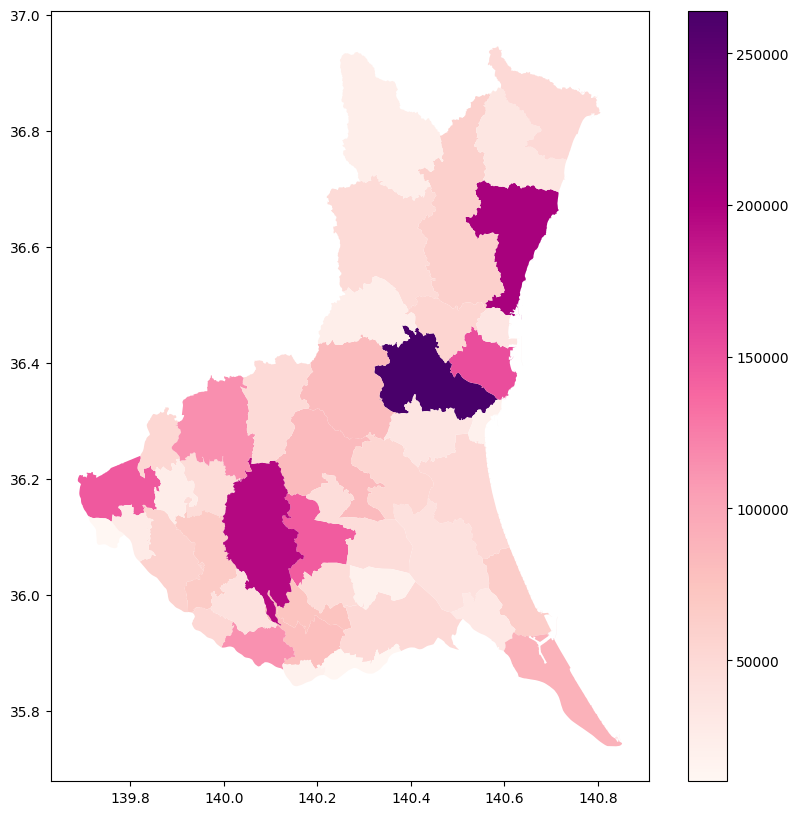

In [18]:
ibaraki_pop2003.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

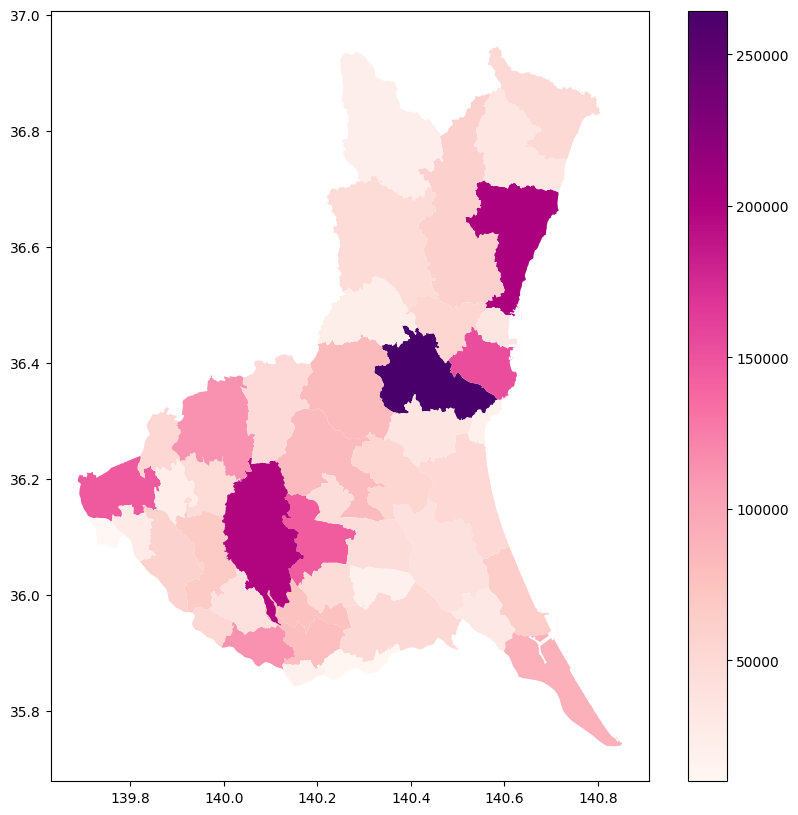

In [19]:
# '年度'列に平成14年の行だけを抽出
df_2004 = ibaraki_chika[ibaraki_chika['年度'] == '2004年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2004 = ibaraki.merge(df_2004,on='KEY_CODE')

ibaraki_pop2004.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

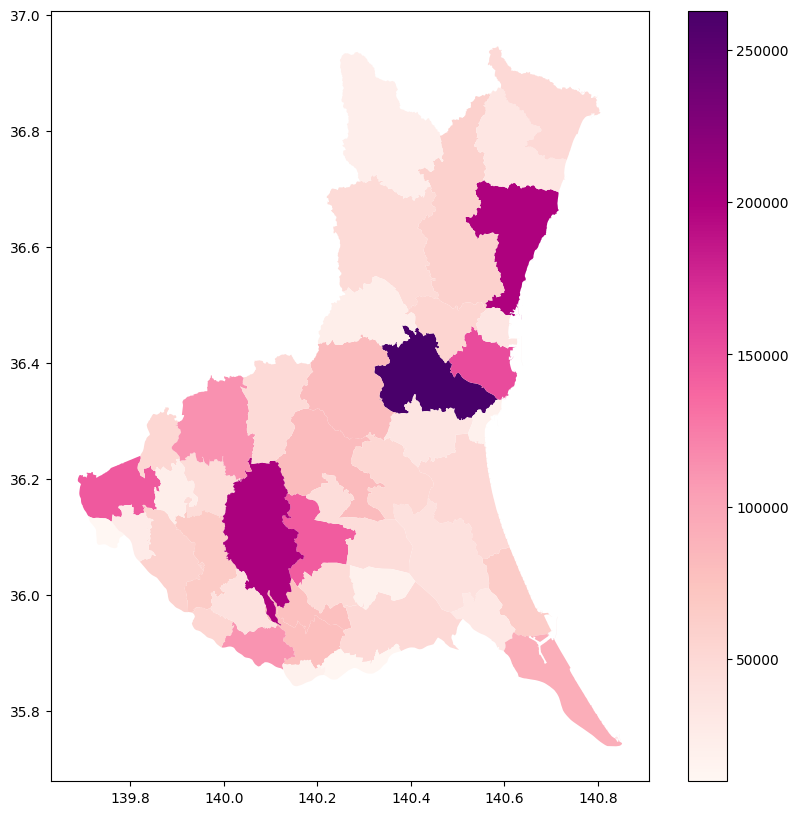

In [20]:
# '年度'列に平成14年の行だけを抽出
df_2005 = ibaraki_chika[ibaraki_chika['年度'] == '2005年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2005 = ibaraki.merge(df_2005,on='KEY_CODE')

ibaraki_pop2005.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

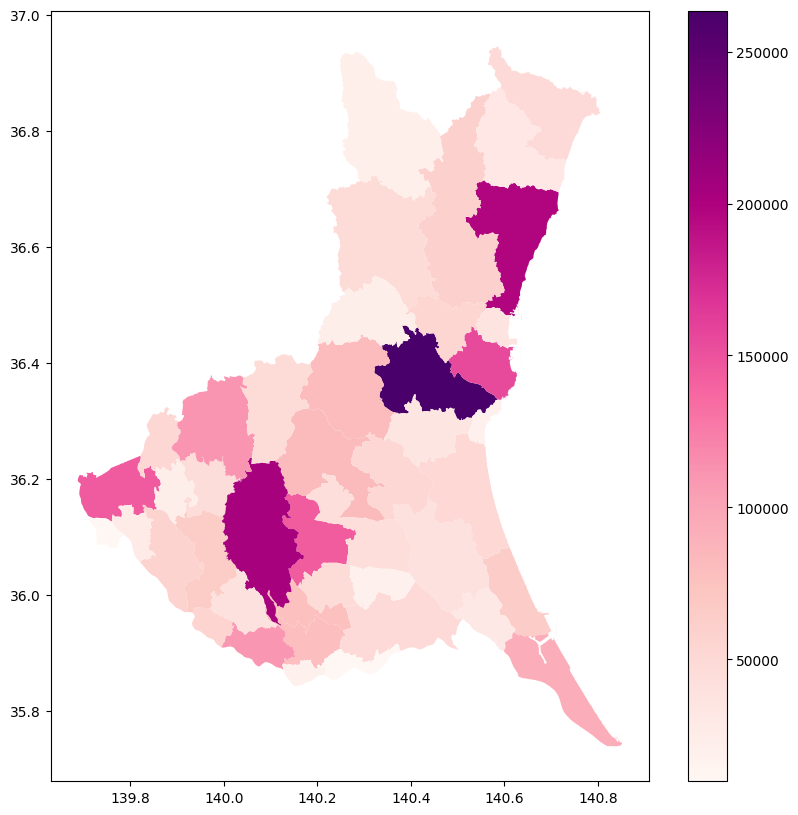

In [21]:
# '年度'列に平成14年の行だけを抽出
df_2006 = ibaraki_chika[ibaraki_chika['年度'] == '2006年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2006 = ibaraki.merge(df_2006,on='KEY_CODE')

ibaraki_pop2006.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

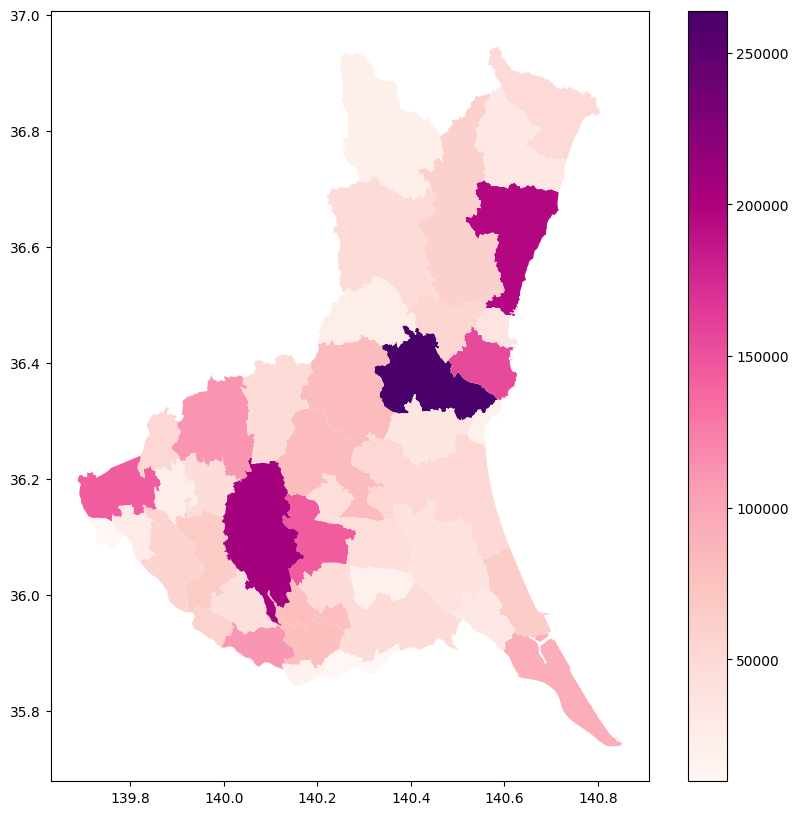

In [22]:
# '年度'列に平成14年の行だけを抽出
df_2007 = ibaraki_chika[ibaraki_chika['年度'] == '2007年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2007 = ibaraki.merge(df_2007,on='KEY_CODE')

ibaraki_pop2007.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

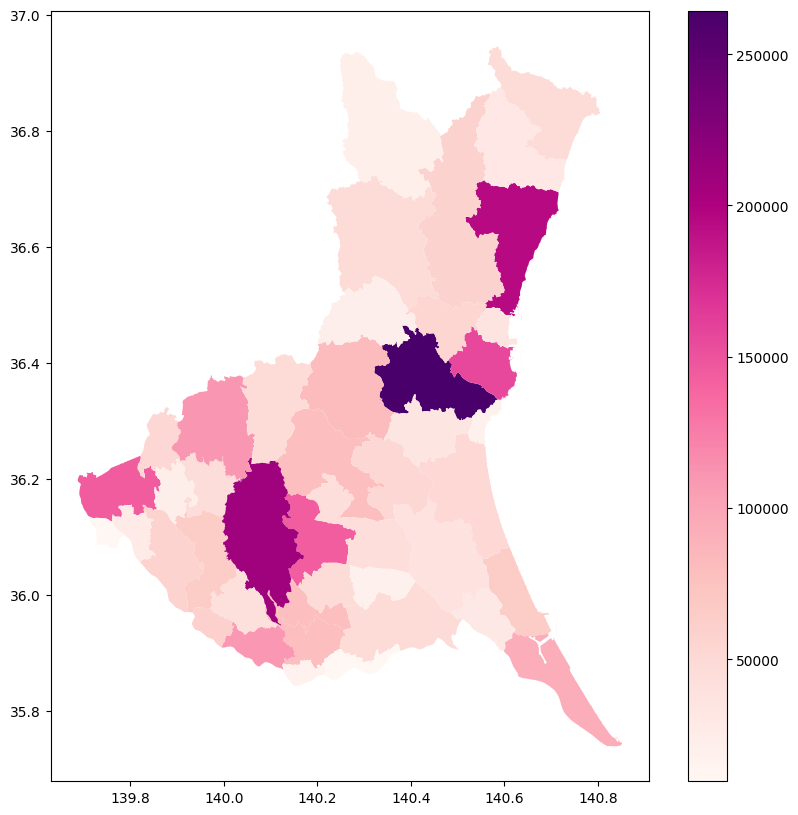

In [23]:
# '年度'列に平成14年の行だけを抽出
df_2008 = ibaraki_chika[ibaraki_chika['年度'] == '2008年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2008 = ibaraki.merge(df_2008,on='KEY_CODE')

ibaraki_pop2008.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

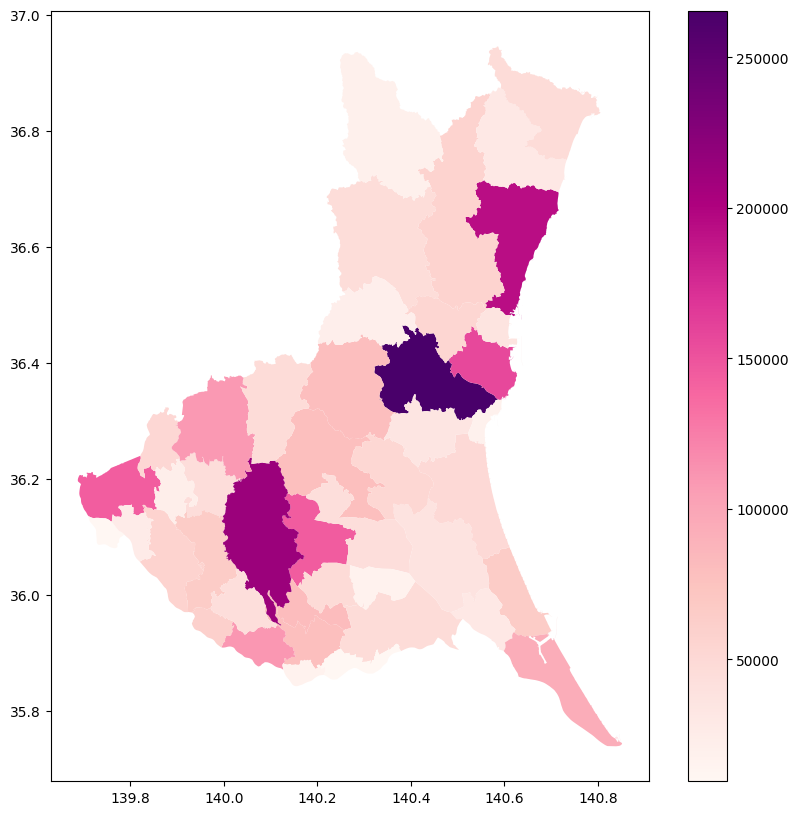

In [24]:
# '年度'列に平成14年の行だけを抽出
df_2009 = ibaraki_chika[ibaraki_chika['年度'] == '2009年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2009 = ibaraki.merge(df_2009,on='KEY_CODE')

ibaraki_pop2009.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

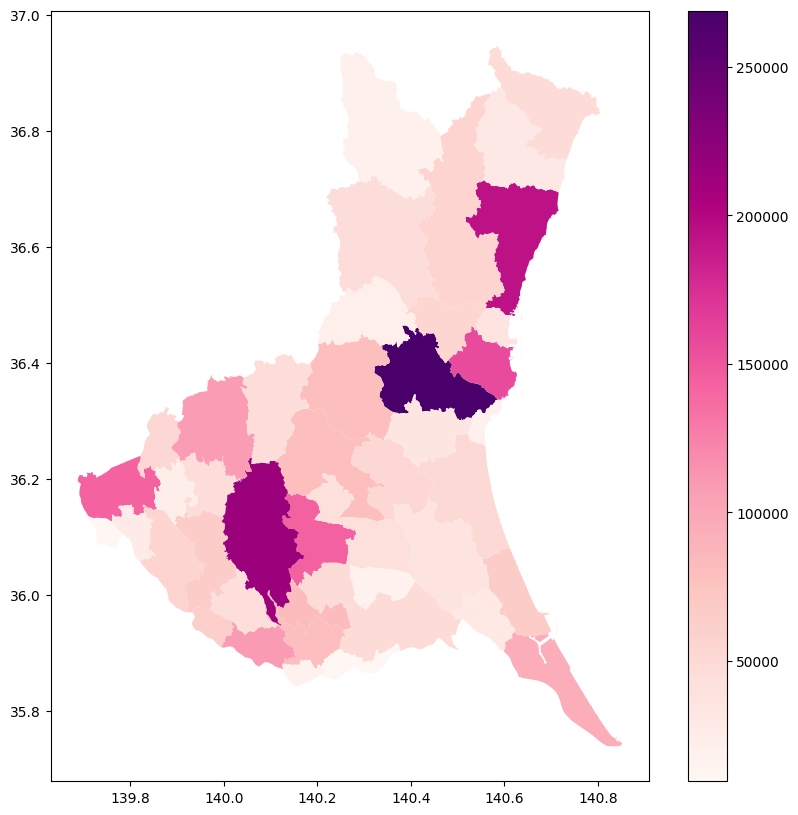

In [25]:
# '年度'列に平成14年の行だけを抽出
df_2010 = ibaraki_chika[ibaraki_chika['年度'] == '2010年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2010 = ibaraki.merge(df_2010,on='KEY_CODE')

ibaraki_pop2010.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

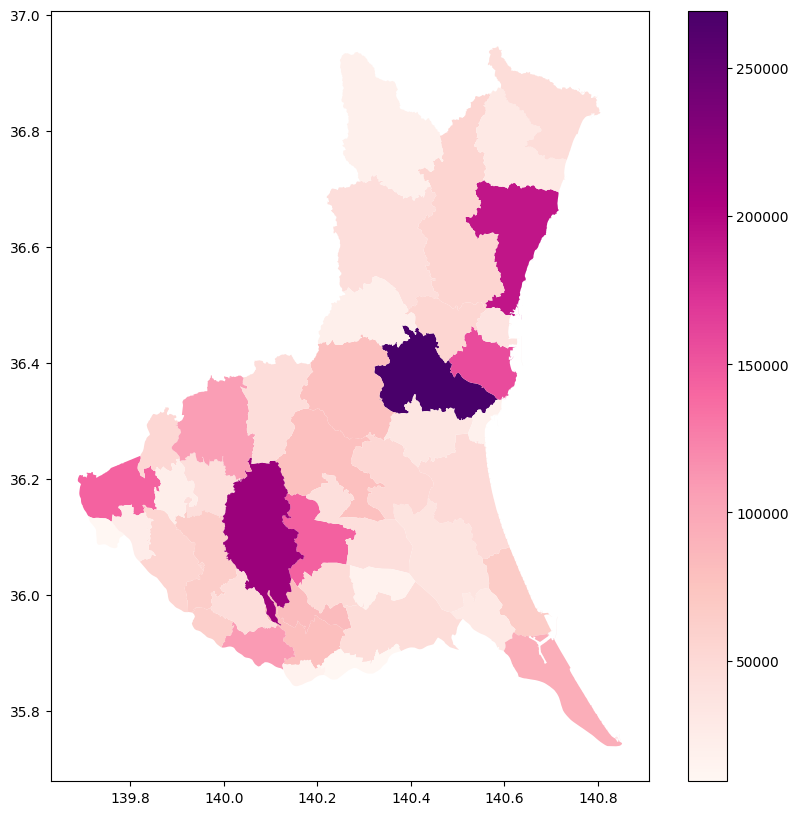

In [26]:
# '年度'列に平成14年の行だけを抽出
df_2011 = ibaraki_chika[ibaraki_chika['年度'] == '2011年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2011 = ibaraki.merge(df_2011,on='KEY_CODE')

ibaraki_pop2011.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

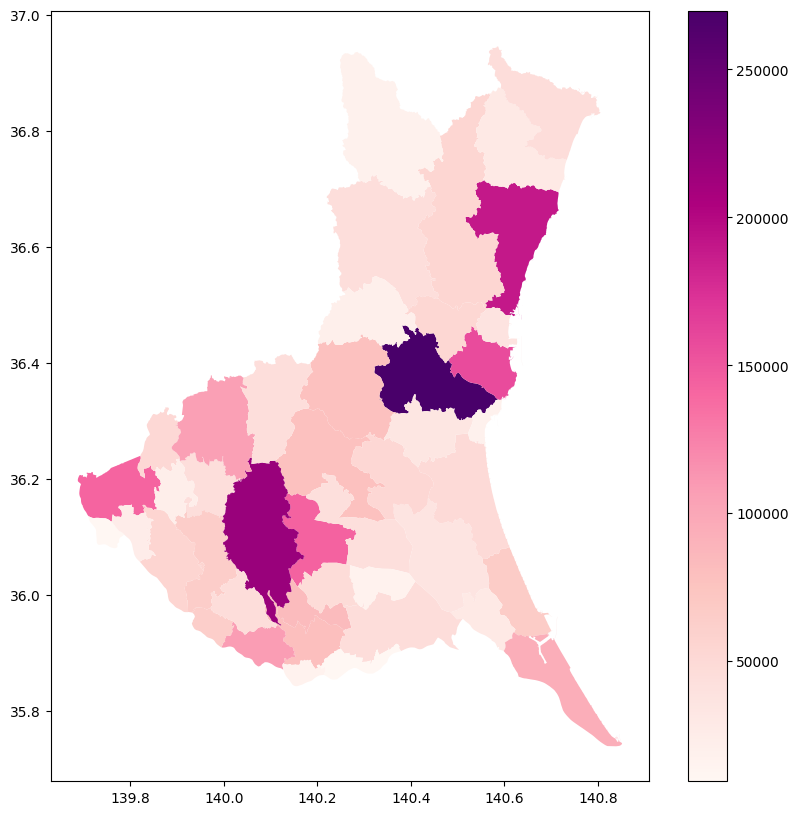

In [27]:
# '年度'列に平成14年の行だけを抽出
df_2012 = ibaraki_chika[ibaraki_chika['年度'] == '2012年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2012 = ibaraki.merge(df_2012,on='KEY_CODE')

ibaraki_pop2012.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

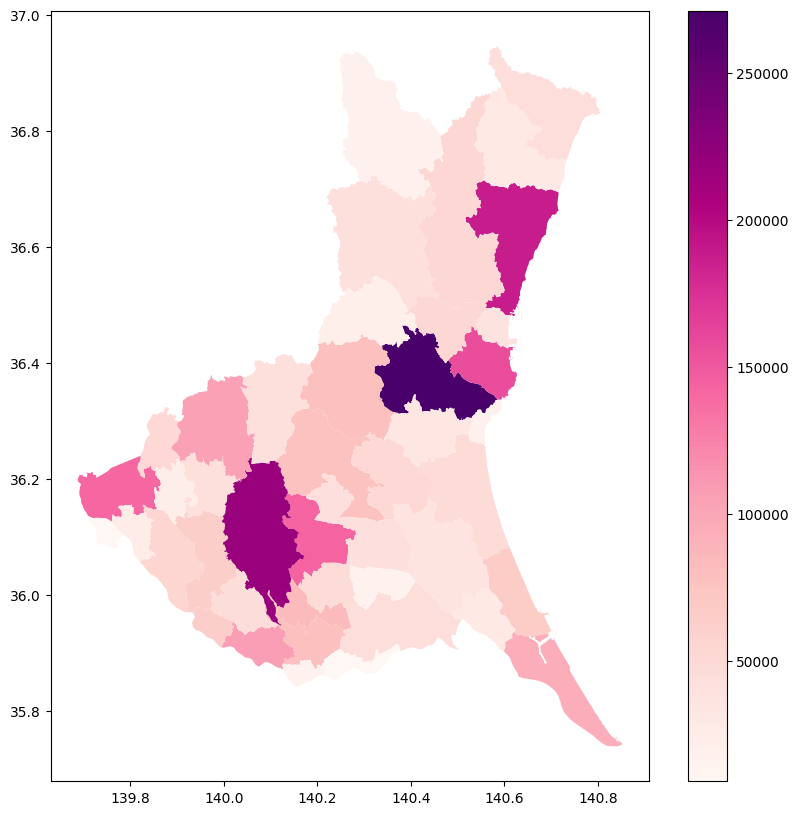

In [28]:
# '年度'列に平成14年の行だけを抽出
df_2013 = ibaraki_chika[ibaraki_chika['年度'] == '2013年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2013 = ibaraki.merge(df_2013,on='KEY_CODE')

ibaraki_pop2013.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

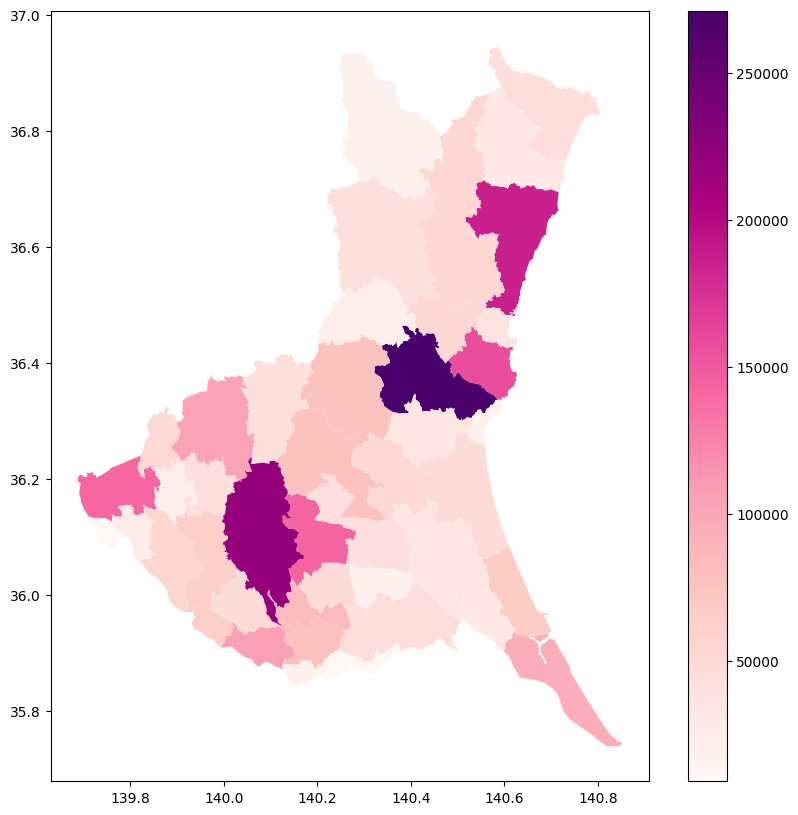

In [29]:
# '年度'列に平成14年の行だけを抽出
df_2014 = ibaraki_chika[ibaraki_chika['年度'] == '2014年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2014 = ibaraki.merge(df_2014,on='KEY_CODE')

ibaraki_pop2014.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

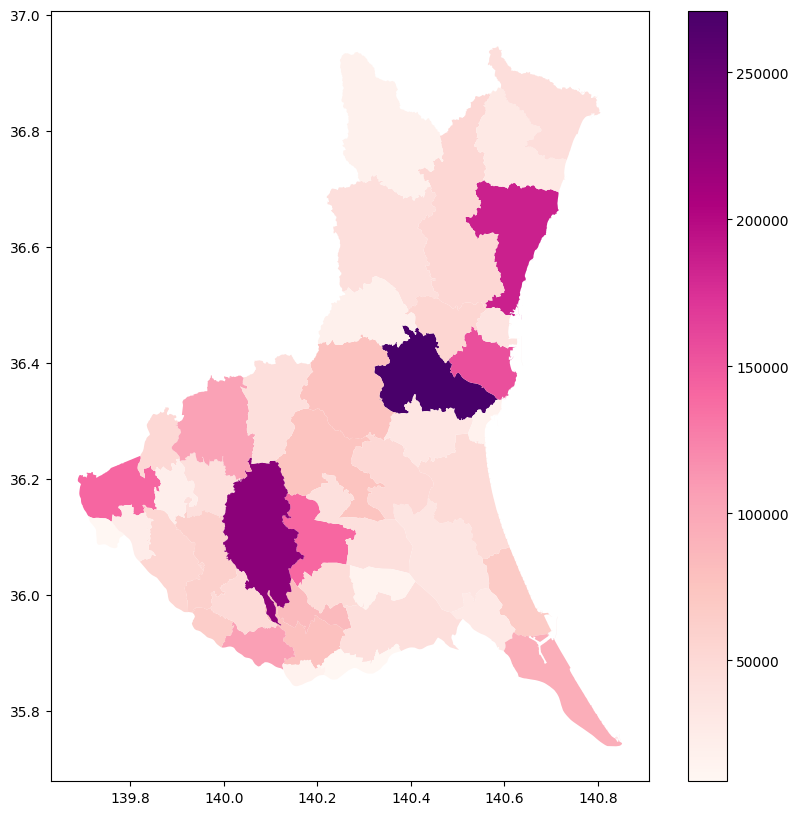

In [30]:
# '年度'列に平成14年の行だけを抽出
df_2015 = ibaraki_chika[ibaraki_chika['年度'] == '2015年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2015 = ibaraki.merge(df_2015,on='KEY_CODE')

ibaraki_pop2015.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

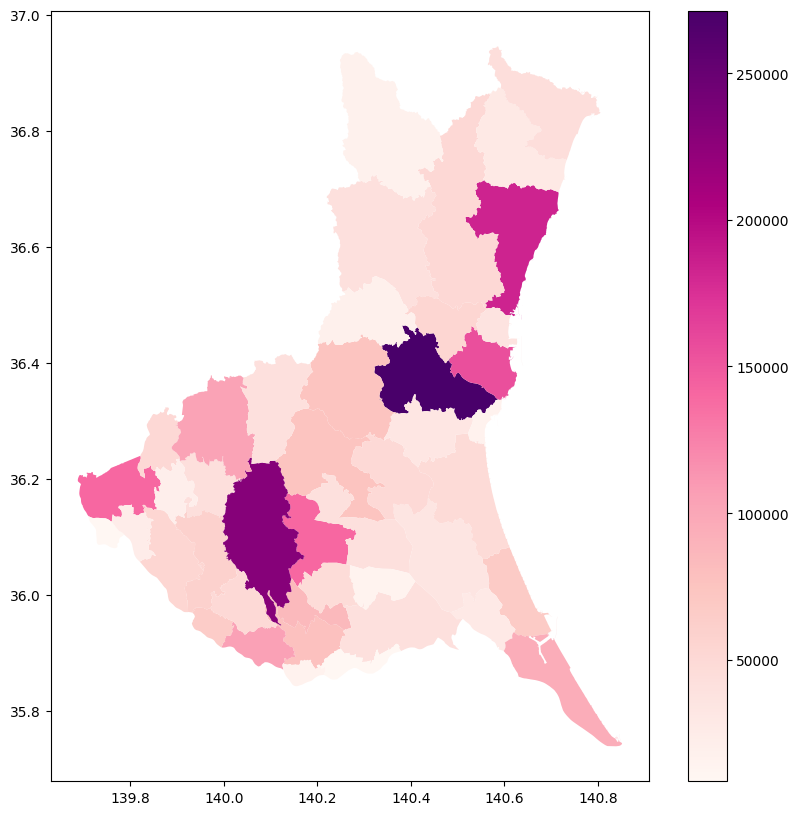

In [31]:
# '年度'列に平成14年の行だけを抽出
df_2016 = ibaraki_chika[ibaraki_chika['年度'] == '2016年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2016 = ibaraki.merge(df_2016,on='KEY_CODE')

ibaraki_pop2016.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

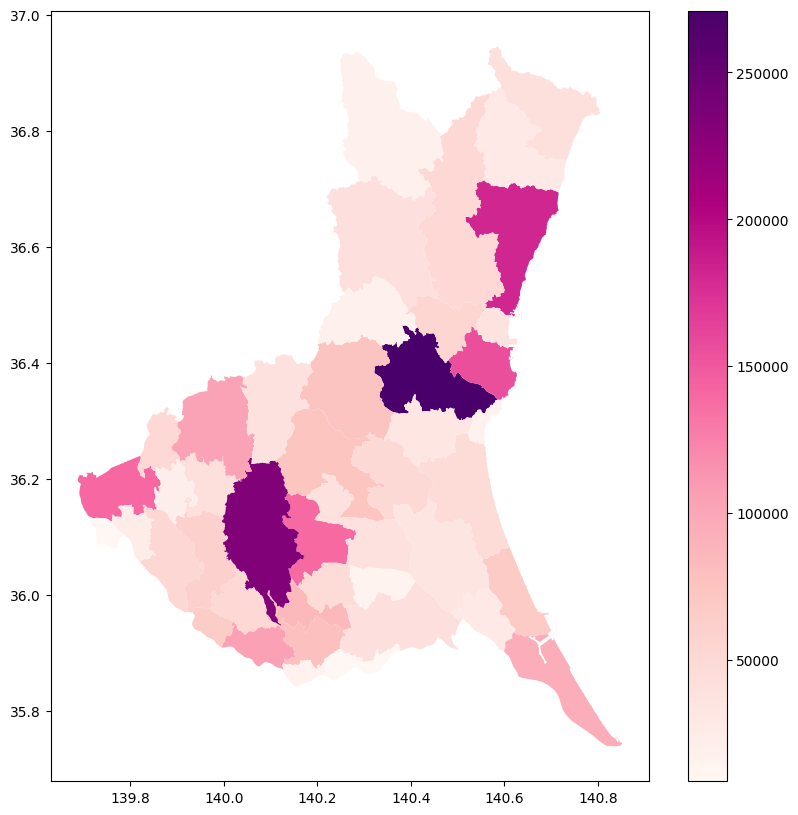

In [32]:
# '年度'列に平成14年の行だけを抽出
df_2017 = ibaraki_chika[ibaraki_chika['年度'] == '2017年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2017 = ibaraki.merge(df_2017,on='KEY_CODE')

ibaraki_pop2017.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

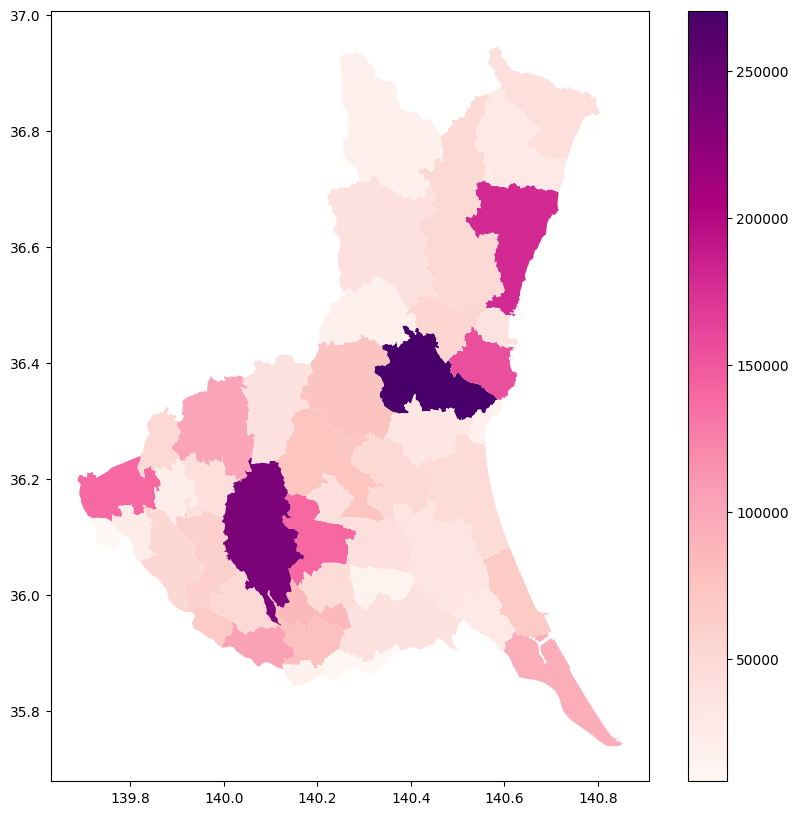

In [33]:
# '年度'列に平成14年の行だけを抽出
df_2018 = ibaraki_chika[ibaraki_chika['年度'] == '2018年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2018 = ibaraki.merge(df_2018,on='KEY_CODE')

ibaraki_pop2018.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

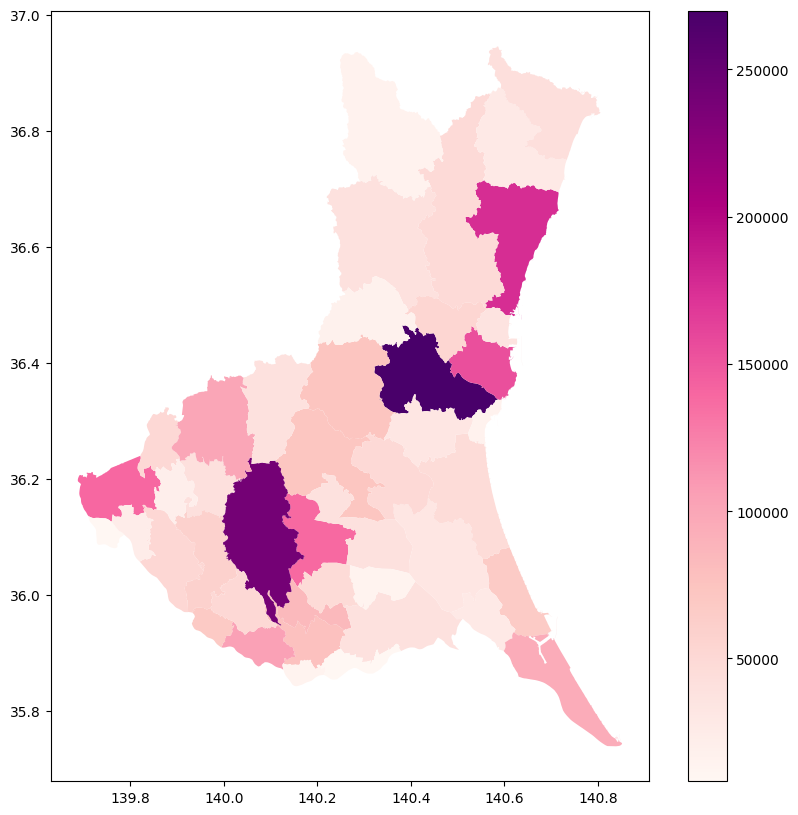

In [34]:
# '年度'列に平成14年の行だけを抽出
df_2019 = ibaraki_chika[ibaraki_chika['年度'] == '2019年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2019 = ibaraki.merge(df_2019,on='KEY_CODE')

ibaraki_pop2019.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

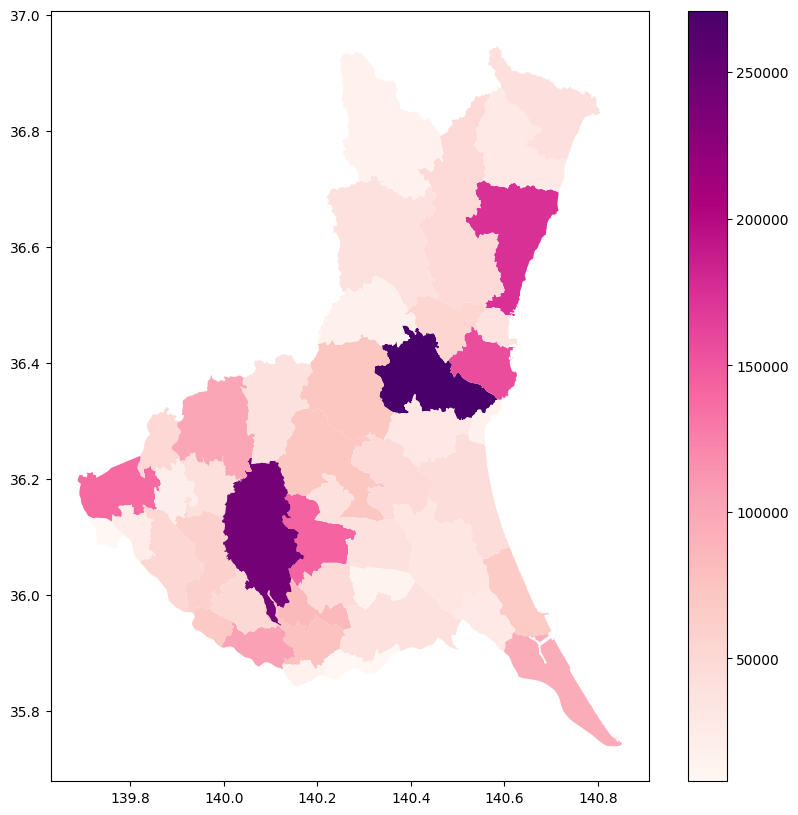

In [35]:
# '年度'列に平成14年の行だけを抽出
df_2020 = ibaraki_chika[ibaraki_chika['年度'] == '2020年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2020 = ibaraki.merge(df_2020,on='KEY_CODE')

ibaraki_pop2020.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

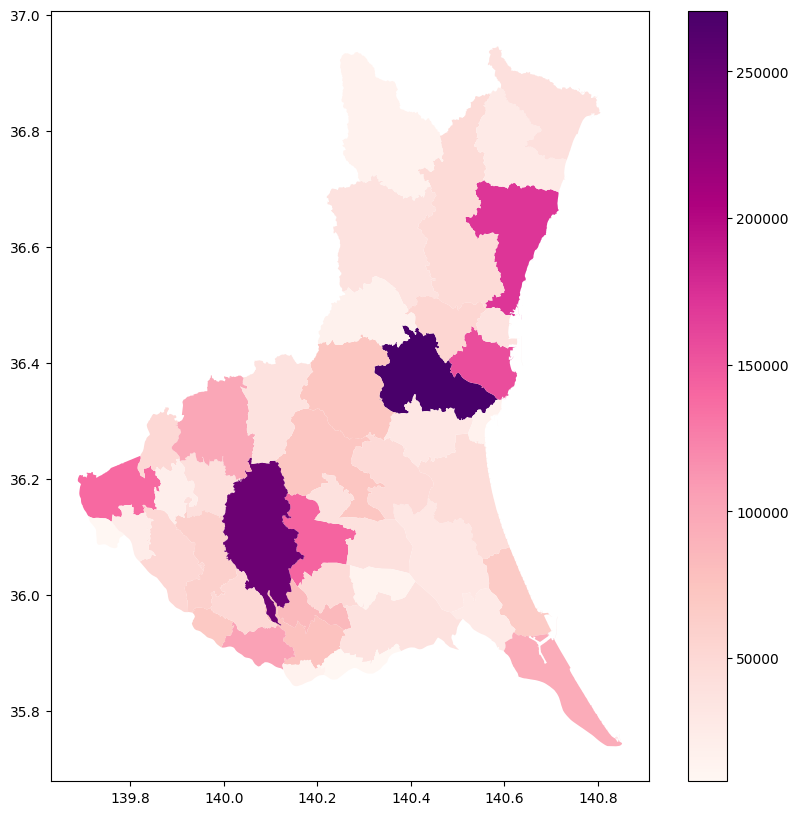

In [36]:
# '年度'列に平成14年の行だけを抽出
df_2021 = ibaraki_chika[ibaraki_chika['年度'] == '2021年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2021 = ibaraki.merge(df_2021,on='KEY_CODE')

ibaraki_pop2021.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

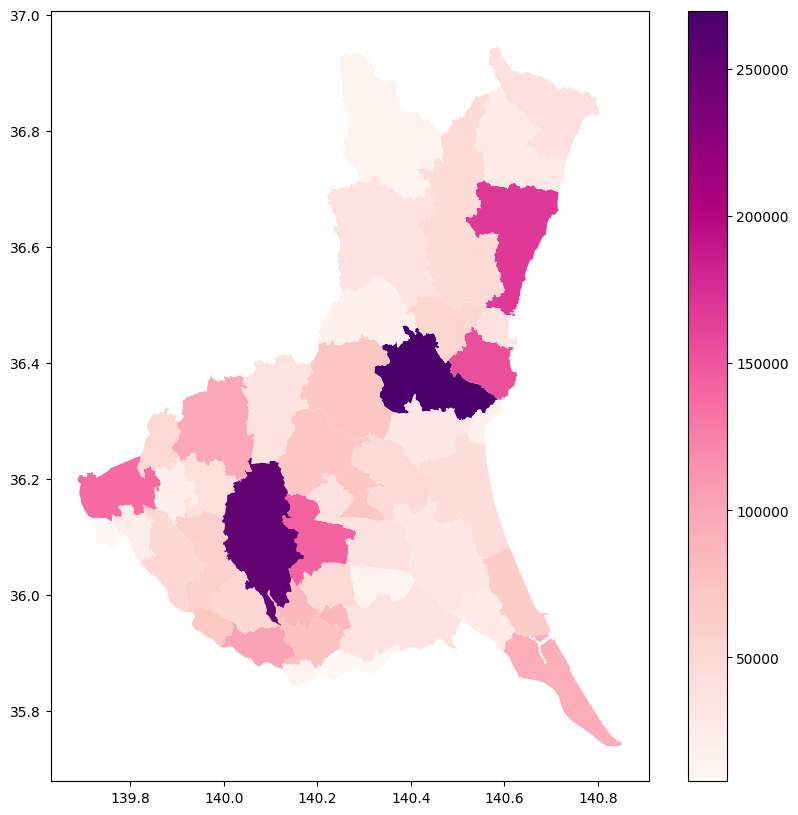

In [37]:
# '年度'列に平成14年の行だけを抽出
df_2022 = ibaraki_chika[ibaraki_chika['年度'] == '2022年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2022 = ibaraki.merge(df_2022,on='KEY_CODE')

ibaraki_pop2022.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

<Axes: >

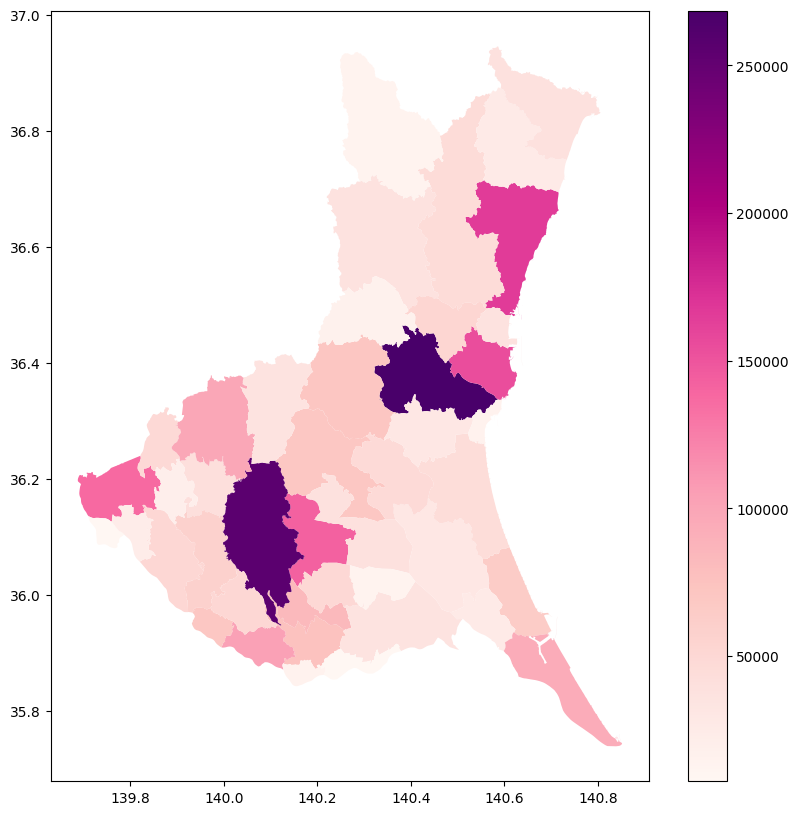

In [38]:
# '年度'列に平成14年の行だけを抽出
df_2023 = ibaraki_chika[ibaraki_chika['年度'] == '2023年']

# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop2023 = ibaraki.merge(df_2023,on='KEY_CODE')

ibaraki_pop2023.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')